<a href="https://colab.research.google.com/github/Venkatesh-Sajja96/Options-Pricing/blob/main/Copy_of_OptionsPricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import yfinance as yf


[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

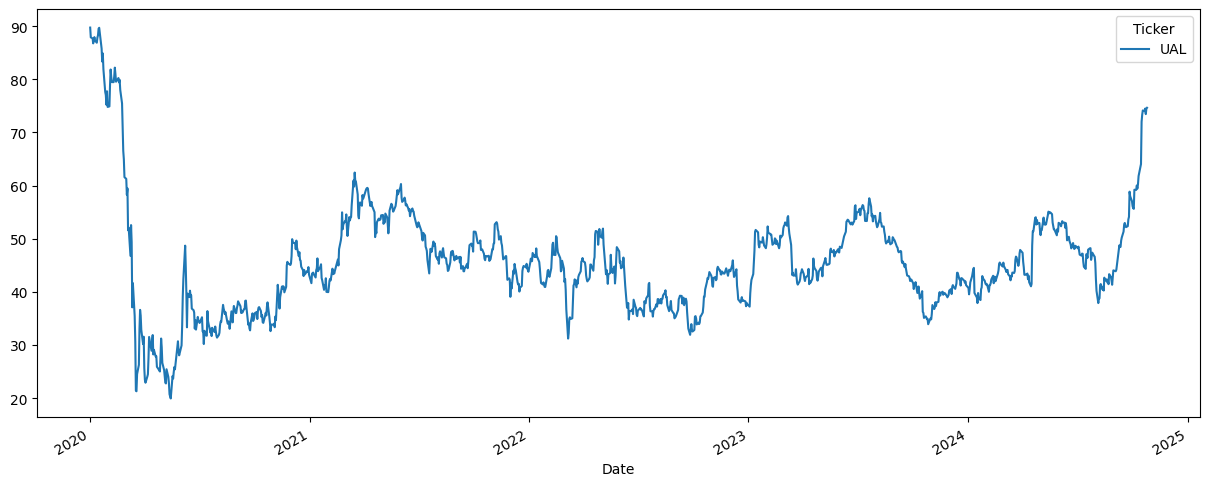

In [ ]:
ticker = 'UAL'
data = yf.download(ticker, start='2020-01-01')['Adj Close']
data.plot(figsize=(15,6))

<ipython-input-10-cb1a6a5e57c0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_returns.iloc[1:])


Text(0, 0.5, 'Frequency')

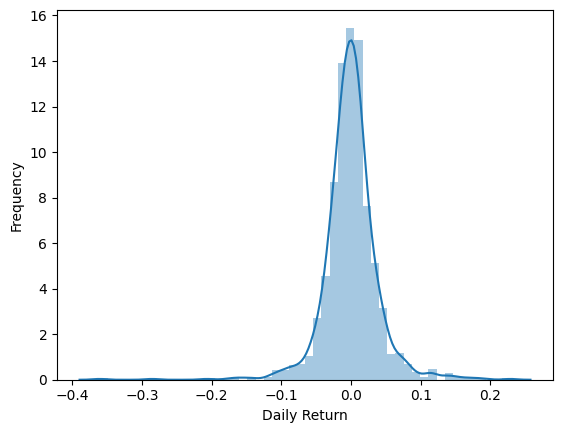

In [ ]:
#create log-normailzed pdf of daily stock returns
log_returns = np.log(1 + data.pct_change())

#Plot
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [ ]:
#calculate the drift
mean = np.mean(log_returns)
variance = log_returns.var()

drift = mean - (0.5 * variance)
print("Drift: ", drift)

Drift:  Ticker
UAL   -0.000932
dtype: float64


In [ ]:
std_dev = log_returns.std()
days = 500
trials = 100

# Compute random variance for each day in each trial (probability of that variance)
Z = np.random.rand(days, trials)

# Transform using percent-point function
Z = norm.ppf(Z)  # Generate normally distributed random values

# Assuming drift is a pre-defined mean of daily returns
daily_returns = np.exp(drift[0] + std_dev[0] * Z)

<ipython-input-12-3f66d4dd7857>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  daily_returns = np.exp(drift[0] + std_dev[0] * Z)


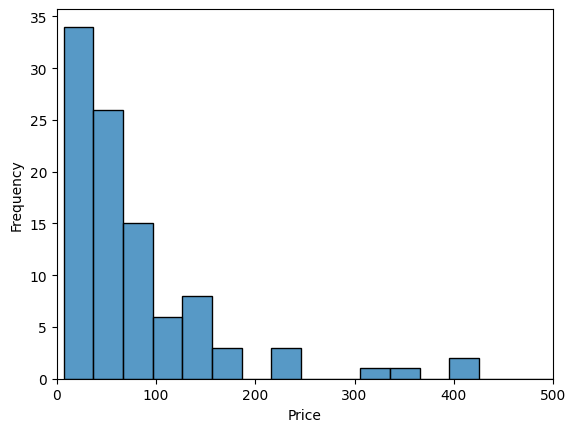

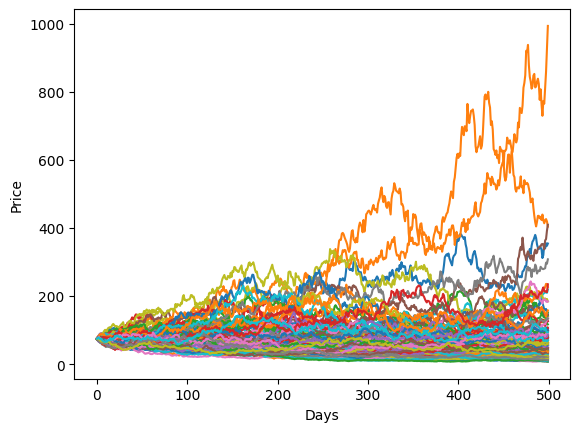

In [ ]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data.iloc[-1]  # Set starting price to the last known price

# Generate different paths
for t in range(1, days):
    price_paths[t] = price_paths[t - 1] * daily_returns[t]

# Visualize the distribution of final prices
ax = sns.histplot(price_paths[-1])
ax.set(xlabel='Price', ylabel='Frequency')
ax.set_xlim(0, 500)

plt.figure()
plt.plot(price_paths)
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [ ]:
#Monte Carlo VaR and CVaR
#VaR is the Value at Risk, and is associated with the likelyhood that a stock has an x% change of going down y% over a z period of time
#CVaR is essentially the average VaR below a certain point or price (expected loss)

def mcVaR(returns, alpha=2):
  if isinstance(returns, pd.Series):
    return np.percentile(returns, alpha)
  else:
    raise TypeError("Expected pandas df")


def mcCVaR(returns, alpha = 5):
  if isinstance(returns, pd.Series):
    below_var = returns <= mcVaR(returns, alpha = alpha)
    return returns[below_var].mean()
  else:
    raise TypeError("Expected pandas df")


portResults = pd.Series(price_paths[-1])
print(portResults[len(portResults-10):len(portResults)])
VaR = data.iloc[0] - mcVaR(portResults, 5)
cVar = data.iloc[0] - mcCVaR(portResults, 5)
print("VaR: $", VaR)
print("cVaR: $", cVar)

Series([], dtype: float64)
VaR: $ Ticker
UAL    78.511456
Name: 2020-01-02 00:00:00+00:00, dtype: float64
cVaR: $ Ticker
UAL    80.913409
Name: 2020-01-02 00:00:00+00:00, dtype: float64


This means that the Value at Risk (VaR) is around $16. The Conditional Value at Risk (CVaR) is the same as the VaR because the number of instances in the bottom 5% is one due to the low simluation count.

[[0.64266852 0.99767419 0.00207667 ... 0.07217254 0.25204806 0.61115773]
 [0.06632849 0.89514615 0.96031809 ... 0.78830181 0.23816263 0.72053647]
 [0.01218553 0.78563826 0.28461687 ... 0.32440595 0.34942896 0.49266096]
 ...
 [0.08238781 0.10181968 0.24703859 ... 0.61908526 0.82086912 0.8279774 ]
 [0.57787125 0.00256207 0.77327737 ... 0.8718461  0.08871766 0.74908252]
 [0.96107129 0.41321991 0.25559438 ... 0.92945684 0.19802707 0.48312769]]
[[ 0.36560083  2.83021884 -2.86627386 ... -1.45979986 -0.66805871
   0.28233776]
 [-1.5037064   1.25436961  1.75438926 ...  0.80054279 -0.71222533
   0.58443592]
 [-2.25122856  0.79137794 -0.56918037 ... -0.45541335 -0.38686262
  -0.01839728]
 ...
 [-1.38918791 -1.27125104 -0.68383845 ...  0.30307924  0.91868232
   0.94620271]
 [ 0.1964506  -2.7991243   0.74968366 ...  1.13516114 -1.34869387
   0.67160537]
 [ 1.76325541 -0.21926989 -0.6569878  ...  1.4717577  -0.84868942
  -0.04230522]]


<ipython-input-17-7042466ec571>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  daily_returns = np.exp(drift[0] + (std_dev[0] * Z))
<ipython-input-17-7042466ec571>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(price_paths)


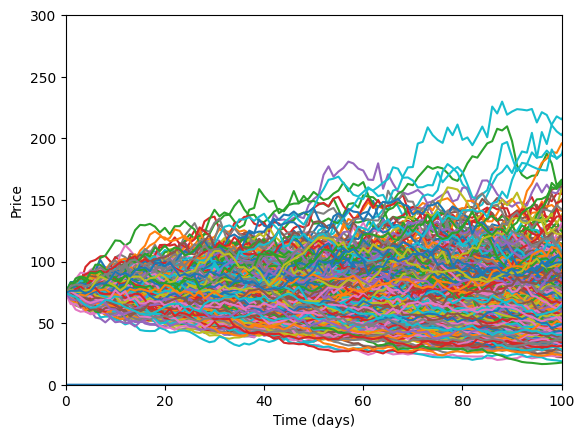

In [ ]:
#compute the volatility
std_dev = log_returns.std()
days = 500
trials = 500

#compute random variance for each day in each trial (probabiity of that variance)
Z = np.random.rand(days, trials)
print(Z)
#transform using percent-point function
Z = norm.ppf(Z) # -inifinity to calculated value is the above randomly generated value
print(Z)

daily_returns = np.exp(drift[0] + (std_dev[0] * Z))

price_paths = np.zeros_like(daily_returns) #create array with same shape as daily_returns
price_paths[0] = data.iloc[-1] #make starting price the last price

#create different paths
for t in range(1, days):
  price_paths[t] = price_paths[t-1]*daily_returns[t] #computer price for certain day

ax = sns.distplot(price_paths)
ax.set(xlabel='Time (days)', ylabel='Price')
#seems correct after stock splits

ax.set_xlim(0,100)
ax.set_ylim(0,300)
plt.plot(price_paths) #holy moly

We redo the simulation with 5 times the number of simulations to see the effects on VaR and CVaR

In [ ]:
portResults = pd.Series(price_paths[-1])
VaR = data.iloc[0] - mcVaR(portResults, 5)
cVar = data.iloc[0] - mcCVaR(portResults, 5)
print("VaR: $", VaR)
print("cVaR: $", cVar)

VaR: $ Ticker
UAL    77.89194
Name: 2020-01-02 00:00:00+00:00, dtype: float64
cVaR: $ Ticker
UAL    80.978314
Name: 2020-01-02 00:00:00+00:00, dtype: float64


We can see that the Var and CVar became more accurate as the number of trials increased. VaR represents the bottom 5% of the predicted portfolio returns, and CVaR is the expected risk or loss of the portfolio.

MIN:  2.9981045458599405
MAX:  1147.4236680201072
MEAN:  71.74330440516036


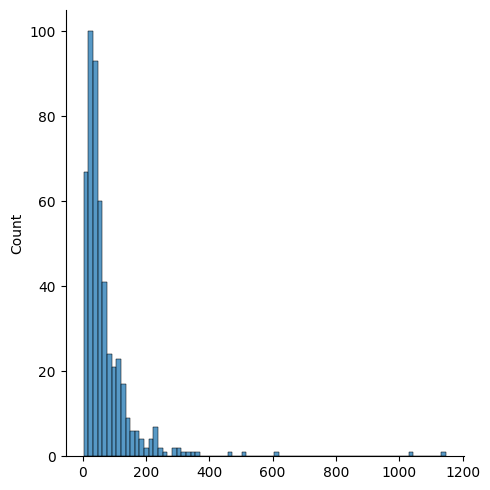

In [ ]:
sns.displot(portResults)

print("MIN: ", min(portResults))
print("MAX: ", max(portResults))
print("MEAN: ", portResults.mean())

Here is the distribution of stock prices by the end of the 100 day Monte Carlo simulation



At this point we would get the price of the forward option by calculating its intrensic value max[0, Su-K] and averaging them out. Then discounting it back to the present and that is our prediction for options pricing with Monte Carlo Simlulations

In [ ]:
ticker_options = yf.Ticker(ticker)
current_price = ticker_options.history(period="1d")["Close"].iloc[-1]

K_atm = current_price
K_itm = current_price * 0.9
K_otm = current_price * 1.1

r = 0.05

# ATM Calculation
forward_options_atm = portResults - K_atm
forward_options_atm = forward_options_atm.where(forward_options_atm >= 0, 0)

# ITM Calculation
forward_options_itm = portResults - K_itm
forward_options_itm = forward_options_itm.where(forward_options_itm >= 0, 0)

# OTM Calculation
forward_options_otm = portResults - K_otm
forward_options_otm = forward_options_otm.where(forward_options_otm >= 0, 0)

# Display Results
print(f"UAL Current Price: {current_price}")
print("ATM Call Price:", forward_options_atm.mean() * np.exp(-r * (500 / 365)))
print("ITM Call Price:", forward_options_itm.mean() * np.exp(-r * (500 / 365)))
print("OTM Call Price:", forward_options_otm.mean() * np.exp(-r * (500 / 365)))

#We can compare these results to actual results(backtest) if needed

UAL Current Price: 74.63999938964844
ATM Call Price: 23.2549108438778
ITM Call Price: 25.402013350680882
OTM Call Price: 21.34524154860992


# **New Section**
# ** ****BINOMIAL OPTIONS PRICING MODEL**** **

In [ ]:
import numpy as np

#initialize parameters
s0 = 100 # stock price
K = 100 # strike price
T = 1 # time to maturity in years
r = 0.06 # annual risk-free rate
N = 3 # number of time-steps
u = 1.1 #up-factor in binomial tree
d = 1/u #down-factor in binomial tree
option_type = 'C' #'C' = call 'P' = put

In [ ]:
#For European options pricing
def binomial_tree(K,T,S0,r,N,u,d,opttype='C'):
    #precompute constants
    dt = T/N
    q = (np.exp(r*dt) - d) / (u-d) #risk free probability rate
    disc = np.exp(-r*dt) #discount rate

    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1) #init 0 array
    S[0] = S0*d**N #populate bottom part of tree
    for j in range(1,N+1):
        S[j] = S[j-1]*u/d #work way up tree formulaically

    # initialise option values at maturity
    C = np.zeros(N+1) ##call tree
    for j in range(0,N+1):
        C[j] = max(0, S[j]-K) #find value of call at end based on stock

    # step backwards through tree
    for i in np.arange(N,0,-1):#
        for j in range(0,i): #
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )#work your way back from tree to discounted init call

    return C[0]

print("Discounted expected value of European call: ", binomial_tree(K,T,s0,r,N,u,d,opttype='C'))




#For American options pricing - only differenct is compare the value of current excersize at every step against value of call
def american_binomial_tree(K,T,S0,r,N,u,d,opttype='C'):
  dt = T/N
  q = (np.exp(r*dt) - d) / (u-d)
  disc = np.exp(-r*dt)

  S = np.zeros(N+1)
  for j in range(0,N+1):
    S[j] = S0 * u**j * d**(N-j)

  C = np.zeros(N+1)

  for j in range(0, N+1):
    if opttype == 'P':
      C[j] = max(0, K - S[j])
    else:
      C[j] = max(0, S[j] - K)


  for i in np.arange(N,0,-1):
    for j in range(0,i):
      S = S0 * u**j * d**(i-j)
      C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )
      if opttype == 'P':
        C[j] = max(C[j], K-S) #difference is here where we compare curr price of call to excersize vvalue (K-S) for puts
      else:
        C[j] = max(C[j], S-K) #compare for calls
  return C[0]

print("Discounted expected value of American Put: ", american_binomial_tree(K,T,s0,r,N,u,d,opttype='P'))

Discounted expected value of European call:  10.145735799928817
Discounted expected value of American Put:  9.235648290150095
